# Students' Performance Analysis

## by (Mfonobong Umoh)

## Introduction
This data set consists of the marks secured by the students in various subjects. We aim to explore the influence of the parents background, test preparation, etc, on students performance.


## Preliminary Wrangling


In [1]:
# importing all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#loading the dataset
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
#exploring the shape of the data
print(df.shape)
df.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preliinary Wrangling

From the dataset, the columns ‘math score’, ‘reading score’, and ‘writing score’ are all dependent variables that may be influenced by the students parents’ level of education, whether or not they took the test preparation course, and their race/ ethnicity.

We will explore these in this project.

Let’s explore the Summary statistics of the dataset

In [4]:
#let's explore the dataset further
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insights
In each of the subjects, there are students that scored 100.
Most of the students did better in ‘reading’.
Math does not seem to be their favorite course.

Let’s grade their scores into ‘A’, ‘B’, ‘C’, ‘D’, and ‘F’
Scores from 90 and above are graded as ‘A’
- 80–89 graded as ‘B’
- 70–79 graded as ‘C’
- 60–69 graded as ‘D’
- 0–59 graded as ‘F’

We will have 3 new columns as ‘math_grade’, ‘reading_grade’, and ‘writing_grade’.

In [5]:
def grade(x):
    if x >= 90:
        return 'A'
    elif x >= 80 and x <=89:
        return 'B'
    elif x >= 70 and x <= 79:
        return 'C'
    elif x >= 60 and x <= 69:
        return 'D'
    else:
        return 'F'
# In this case, the scores are ‘x’

In [6]:
df['math grade'] = np.vectorize(grade)(df['math score'])
df['reading grade'] = np.vectorize(grade)(df['reading score'])
df['writing grade'] = np.vectorize(grade)(df['writing score'])

In [7]:
#Let’s see a glimpse of our data

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math grade,reading grade,writing grade
0,female,group B,bachelor's degree,standard,none,72,72,74,C,C,C
1,female,group C,some college,standard,completed,69,90,88,D,A,B
2,female,group B,master's degree,standard,none,90,95,93,A,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,F,F
4,male,group C,some college,standard,none,76,78,75,C,C,C


Let’s reorder the columns so that the ‘grade’ columns for each course come after their respective scores.

In [8]:
data = df[["gender", "race/ethnicity", "parental level of education", "lunch", 
           "test preparation course", "math score", "math grade", "reading score", 
           "reading grade", "writing score", "writing grade"  ]]

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math grade,reading grade,writing grade
0,female,group B,bachelor's degree,standard,none,72,72,74,C,C,C
1,female,group C,some college,standard,completed,69,90,88,D,A,B
2,female,group B,master's degree,standard,none,90,95,93,A,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,F,F
4,male,group C,some college,standard,none,76,78,75,C,C,C


### What is the structure of your dataset?

> There are 1000 entries and 8 columns in the dataset. Only 3 of the variables are of numeric data type.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the students' performance in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that race/ethnicity,	parental level of education, lunch, and	test preparation course will have the strongest effect on the students' performance.

## Univariate Exploration

> Let's investigate distributions of individual variables.

F    323
D    268
C    216
B    135
A     58
Name: math grade, dtype: int64


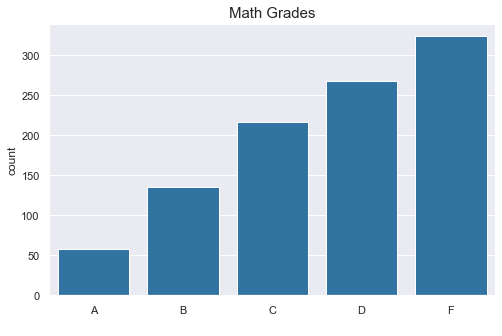

In [10]:
# Let’s look at the number of students in each grade category
base_color = sb.color_palette()[0]

gen_order = ["A", "B", "C", "D", "F"]


print(df['math grade'].value_counts())

plt.figure(figsize = [8,5])
sb.set(style="darkgrid")

sb.countplot(x ='math grade', data = df, color = base_color, order = gen_order)

plt.title('Math Grades', fontsize = 15)

plt.xlabel(' ')

plt.show()

C    264
F    254
D    233
B    170
A     79
Name: reading grade, dtype: int64


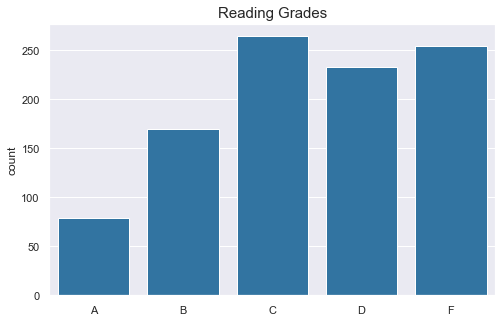

In [11]:
print(df['reading grade'].value_counts())


plt.figure(figsize = [8,5])

sb.countplot(x ='reading grade', data = data, order = gen_order, color = base_color)

plt.title('Reading Grades', fontsize = 15)

plt.xlabel(' ')

plt.show()

F    281
C    254
D    230
B    157
A     78
Name: writing grade, dtype: int64


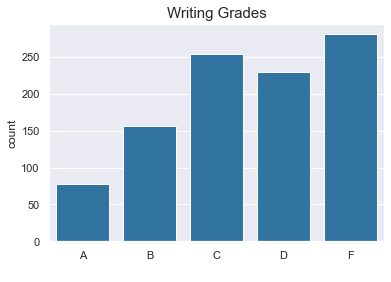

In [12]:
print(df['writing grade'].value_counts())

sb.countplot(x ='writing grade', data = data, order = gen_order, color = base_color)

plt.title('Writing Grades', fontsize = 15)

plt.xlabel(' ')

plt.show()

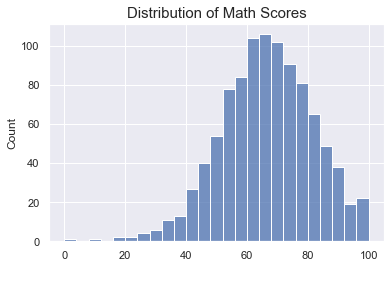

In [13]:
sb.histplot(df['math score'])

plt.title('Distribution of Math Scores', fontsize = 15)

plt.xlabel(' ')

plt.show()

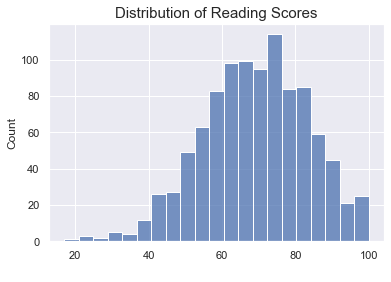

In [14]:
sb.histplot(df['reading score'])

plt.title('Distribution of Reading Scores', fontsize = 15)

plt.xlabel(' ')

plt.show()

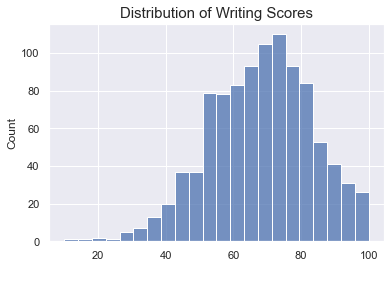

In [15]:
sb.histplot(df['writing score'])

plt.title('Distribution of Writing Scores', fontsize = 15)

plt.xlabel(' ')

plt.show()

### What are the distribution(s) of the variable(s) of interest. Were there any unusual points?
> Most of the students had F grade in writing and Math. Only few students had A's across all the subjects.

### Of the features  investigated, were there any unusual distributions?

> There were normal distribution of grades across all the subjects.

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the
data.

 ### How did the male and female students perform across all courses?


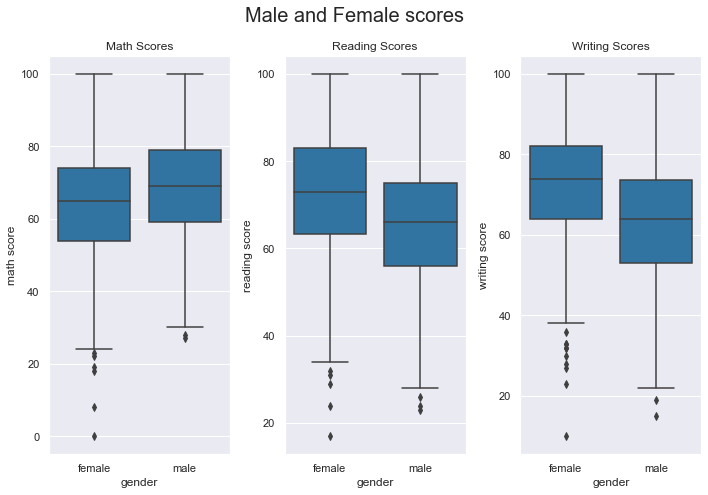

In [16]:
fig, (axes) = plt.subplots(nrows=1,ncols=3, figsize=(10,7))

fig.suptitle('Male and Female scores', fontsize=20) 

sb.boxplot(x='gender', y='math score', data=df, ax =axes[0], color = base_color)

sb.boxplot(x='gender', y='reading score', data=df, ax =axes[1], color = base_color)

sb.boxplot(x='gender', y='writing score', data=df, ax =axes[2], color = base_color)

axes[0].title.set_text('Math Scores')

axes[1].title.set_text('Reading Scores')

axes[2].title.set_text('Writing Scores')


plt.tight_layout()

In math, the female students performed better than the male students, while the reverse is the case in reading and writing, where male students did better.

### The influence of the parental level of education on the students’ test performance

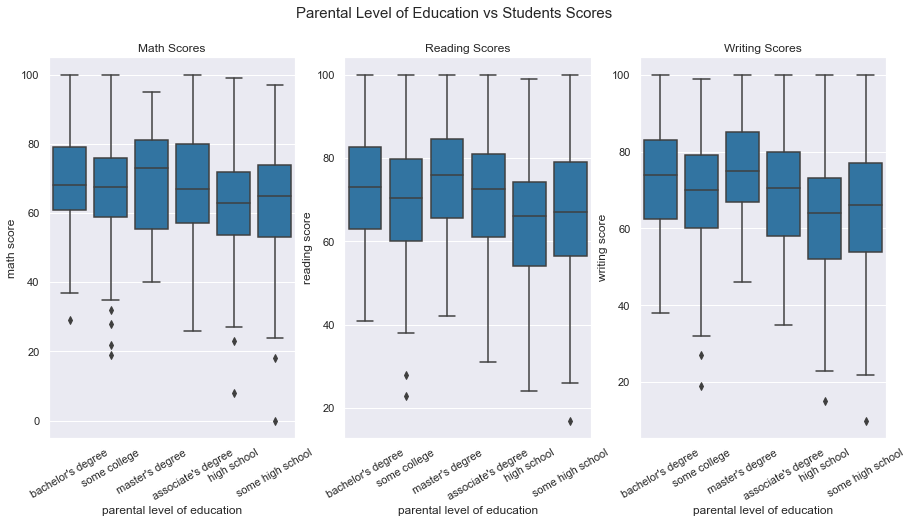

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3, figsize=(15,7))

fig.suptitle('Parental Level of Education vs Students Scores', fontsize=15) 

sb.boxplot(x='parental level of education', y='math score', data=df, ax =ax1, color = base_color)

sb.boxplot(x='parental level of education', y='reading score', data=df, ax =ax2, color = base_color)

sb.boxplot(x='parental level of education', y='writing score', data=df, ax =ax3, color = base_color)

ax1.title.set_text('Math Scores')

ax2.title.set_text('Reading Scores')

ax3.title.set_text('Writing Scores')

var1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)

var2 = ax2.set_xticklabels(ax1.get_xticklabels(), rotation=30)

var3 = ax3.set_xticklabels(ax1.get_xticklabels(), rotation=30)

From the above plots, it can be concluded that the parents’ level of education has had an impact on the students’ performance.

Students whose parents possess a master’s degree had the best performance across all the courses while those with parents whose education level ended at high school had the least performance in all the courses.

Also, students whose parents possess bachelor’s degrees performed consistently well in all the courses.

### Some students enrolled for the ‘test preparation course’ while others did not. Do you think this will have an influence on their test performances?

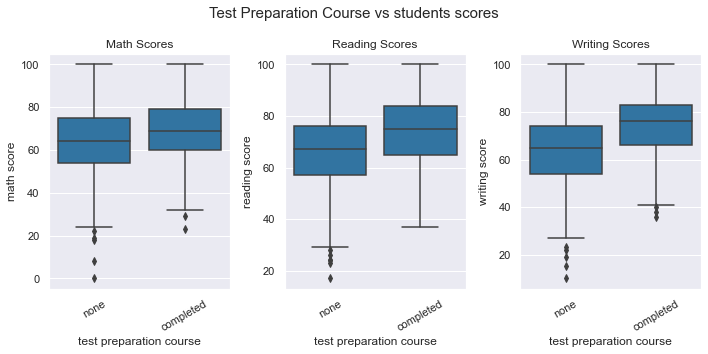

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3, figsize=(10,5))

fig.suptitle('Test Preparation Course vs students scores', fontsize=15) 

sb.boxplot(x='test preparation course', y='math score', data=df, ax =ax1, color = base_color)

sb.boxplot(x='test preparation course', y='reading score', data=df, ax =ax2, color = base_color)

sb.boxplot(x='test preparation course', y='writing score', data=df, ax =ax3, color = base_color)

ax1.title.set_text('Math Scores')

ax2.title.set_text('Reading Scores')

ax3.title.set_text('Writing Scores')

var1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)

var2 = ax2.set_xticklabels(ax1.get_xticklabels(), rotation=30)

var3 = ax3.set_xticklabels(ax1.get_xticklabels(), rotation=30)




plt.tight_layout()

Students who completed the test preparation course unarguably performed better than those who did not. Some of the students that scored zero are those who did not complete the preparation course.

### How about their lunch types? let’s see!


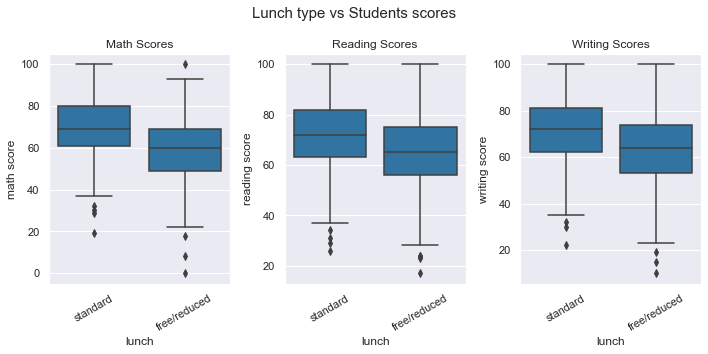

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3, figsize=(10,5))

fig.suptitle('Lunch type vs Students scores', fontsize=15) 

sb.boxplot(x='lunch', y='math score', data=df, ax =ax1, color = base_color)

sb.boxplot(x='lunch', y='reading score', data=df, ax =ax2, color = base_color)

sb.boxplot(x='lunch', y='writing score', data=df, ax =ax3, color = base_color)

ax1.title.set_text('Math Scores')

ax2.title.set_text('Reading Scores')

ax3.title.set_text('Writing Scores')

var1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)

var2 = ax2.set_xticklabels(ax1.get_xticklabels(), rotation=30)

var3 = ax3.set_xticklabels(ax1.get_xticklabels(), rotation=30)


plt.tight_layout()

From the above plots, students who received standard lunch performed better across all courses than those who received free or reduced lunch.

### Relationship between the race/ethnicity of the students and their performance

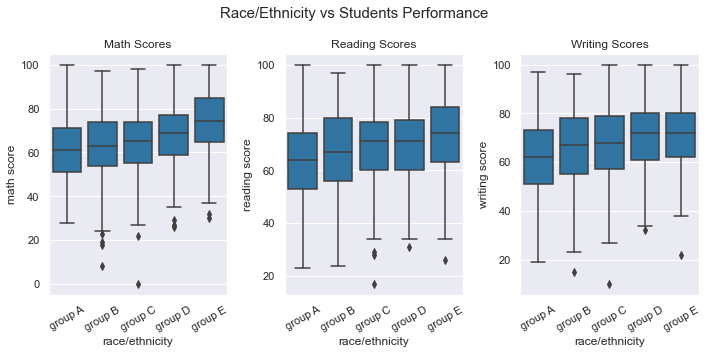

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3, figsize=(10,5))

plot_order = ['group A', 'group B', 'group C', 'group D', 'group E']


fig.suptitle('Race/Ethnicity vs Students Performance', fontsize=15) 

sb.boxplot(x='race/ethnicity', y='math score', data=df, ax =ax1, color = base_color, order = plot_order)

sb.boxplot(x='race/ethnicity', y='reading score', data=df, ax =ax2, color = base_color, order = plot_order)

sb.boxplot(x='race/ethnicity', y='writing score', data=df, ax =ax3, color = base_color, order = plot_order)

ax1.title.set_text('Math Scores')

ax2.title.set_text('Reading Scores')

ax3.title.set_text('Writing Scores')

var1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)

var2 = ax2.set_xticklabels(ax1.get_xticklabels(), rotation=30)

var3 = ax3.set_xticklabels(ax1.get_xticklabels(), rotation=30)



plt.tight_layout()

Students in ‘group E’ had the best performance across all the courses followed by those in ‘group D’, while students in ‘group A’ had the worst performance.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Students whose parents possess a master’s degree had the best performance across all the courses while those with parents whose education level ended at high school had the least performance in all the courses.

> Also, students whose parents possess bachelor’s degrees performed consistently well in all the courses.

> Students who completed the test preparation course unarguably performed better than those who did not. Some of the students that scored zero are those who did not complete the preparation course.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In math, the female students performed better than the male students, while the reverse is the case in reading and writing, where male students did better.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

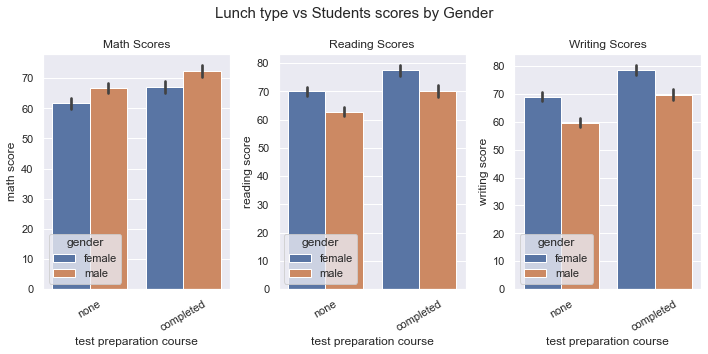

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3, figsize=(10,5))

fig.suptitle('Lunch type vs Students scores by Gender', fontsize=15) 

sb.barplot(x='test preparation course', y='math score', hue = 'gender',  data=df, ax =ax1)

sb.barplot(x='test preparation course', y='reading score',hue = 'gender', data=df, ax =ax2)

sb.barplot(x='test preparation course', y='writing score', hue = 'gender', data=df, ax =ax3)

ax1.title.set_text('Math Scores')

ax2.title.set_text('Reading Scores')

ax3.title.set_text('Writing Scores')

var1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)

var2 = ax2.set_xticklabels(ax1.get_xticklabels(), rotation=30)

var3 = ax3.set_xticklabels(ax1.get_xticklabels(), rotation=30)

plt.tight_layout()

Female students who recieved standard lunch performed better in writing and reading, while male performed better in Math

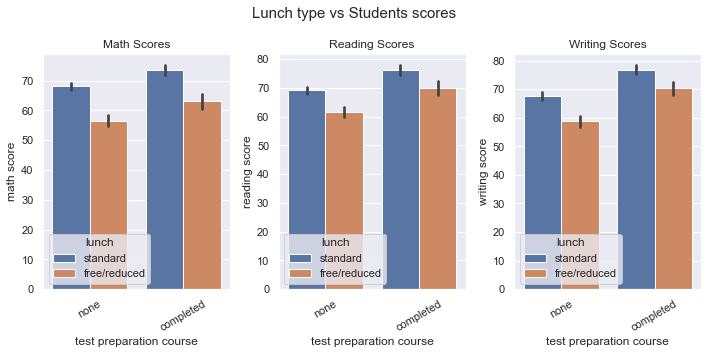

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3, figsize=(10,5))

fig.suptitle('Lunch type vs Students scores', fontsize=15) 

sb.barplot(x='test preparation course', y='math score', hue = 'lunch',  data=df, ax =ax1)

sb.barplot(x='test preparation course', y='reading score',hue = 'lunch', data=df, ax =ax2)

sb.barplot(x='test preparation course', y='writing score', hue = 'lunch', data=df, ax =ax3)

ax1.title.set_text('Math Scores')

ax2.title.set_text('Reading Scores')

ax3.title.set_text('Writing Scores')

var1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)

var2 = ax2.set_xticklabels(ax1.get_xticklabels(), rotation=30)

var3 = ax3.set_xticklabels(ax1.get_xticklabels(), rotation=30)

plt.tight_layout()

Students who recieved standard lunch performed better across all the sublects. Better performances were also recorded from students who completed their test preparation course.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Students who recieved standard lunch performed better across all the sublects. Better performances were also recorded from students who completed their test preparation course.

### Were there any interesting or surprising interactions between features?

> Female students who recieved standard lunch performed better in writing and reading, while male performed better in Math.


## Conclusions
> Students whose parents had a master’s degree had the best performance across all the courses while those with parents with high school degrees had the worst performances. Students whose parents possessed bachelor’s degrees performed persistently well in all the courses.

> Students who completed the test preparation course performed better than those who did not.

> Students who ate standard lunch performed better across all courses than those who received free or reduced lunch.

> Students from race/ethnic ‘group E’ had the best performance across all the courses followed by those from ‘group D’, while students from ‘group A’ had the worst performance.

